In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.10.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
plt.imshow(x_train_full[10])

In [6]:
y_train_full[10]

0

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",  "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train_full[1]]

'T-shirt/top'

In [9]:
x_train_full[10]       #It represents the pixel values of image present at 10th index of x_train_full with 28 rows and 28 columns

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

## Data Reshape

In [10]:
x_train_full = x_train_full.reshape((60000, 28, 28, 1))       #Here we create 3D 28 and 28 for length and width , 1 is for no. of chnnels here gray scale images are only present so only one channel in case of color images we can use 3 channels.
x_test = x_test.reshape((10000, 28, 28, 1))

## Data Normalization
* For running gradient descent model we need to normalize the data first between 0 and 1
* We then normalizing the data dimensions so that they are of approximately the same scale.
* For normalizing data we divide all the values by max value present in data
* As we know in given dataset the values are present in the scale of 0 to 255. so we can directly dividing it by max value i.e. 255
* But for general databases we don't know about absolute scale so we generally subtract the mean from these no.s and divided by their standard deviations.

In [11]:
x_train_n = x_train_full / 255.
x_test_n = x_test / 255.

## Split the data into train/validation/test datasets
In the earlier step of importing the data. We had 60,000 datasets for training and 10,000 test datasets. Now we know further split the trianing data into train/validation. Here is how each type of dataset is used in deep learning.

    * Training data : Used for training the model.
    * Validation data: Used for tuning the hyperparameters and evaluate the models.
    * Test data: Used to test the model after the model has gone through initial vetting by the validation set.

In [12]:
x_valid, x_train = x_train_n[: 5000], x_train_n[5000: ]
y_valid, y_train = y_train_full[: 5000], y_train_full[5000: ]
x_test = x_test_n

## Create the model architecture 
There are two API's for defining a model in keras.

    * Sequential model API:
        used for straight forward networks like inputs are taken layer by layer. It means first layers output will be input for third layer not 4th or 5th layer.
    
    * Functional API:
        used for complex networks like if we need the connect the input layer with something another hidden layer or any layer This model has this functionality. as it is more complex than sequential model api but it is flexible.

In [13]:
np.random.seed(42)
tf.random.set_seed(42)


* Input layer is 28x28 pixels we want out put as 10 categories.
* as this is classification model so for hidden layers we are using ReLu Activation function and for Output layer Softmax Activation function.

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu', input_shape = (28, 28, 1)))    #here kernel_size means the size of filter if we want 5x5 then we can modify using same.
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

* Suggested the code by tensorflow for above same

model = keras.models.Sequential()
* Use the Input layer to define the input shape
model.add(keras.layers.InputLayer(input_shape=(28, 28, 1)))

* Add the Conv2D layer without specifying the input_shape here
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='valid', activation='relu'))

* Add the MaxPooling2D layer
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

* Flatten the output and add Dense layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

*.add used for add the layer.
* Flatten is used for convert the 2D array into 1D array.
* .Dense is used for no. of neurons we want to make the layer with.
* In classification model we use relu activation function for hidden layers and for output layer sofftmax activation function.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

* In output shape we have not specified the class size so it has taken complete(  , 784), and neurons present in respective layers(  , 784.
* param is the no. of variables that need to optimize. It is calculated like for dens_1 nerons are 100 and for above layer 300 so multiplying them and adding neurons no. equals 100 i.e present in dense_1 layer we get 30100.

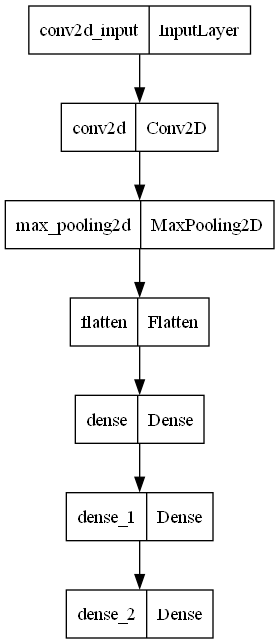

In [16]:
#import pydot
keras.utils.plot_model(model)

* We can access the parameters using get_weight() method

* Before training our model we need to setup the learning processes and to do that we will use the compile method.
* In our data we have 10 different labels so we are using sparse_categorical_crossentropy.
* If instead we have probability per class in our y variable then we have to use categorical_crossentropy.
* If we had binary labels such as yes or no , true or false in this case we have to use binary_crossentropy.
* optimizer set to "sgd" it means stocastic gradient descent. in other words we are telling to keras to perform backpropogation algorithm.
* As we are using classifier so metrix set to accuracy, if it is regression then it will be mean square error.
* https://keras.io/api/models/sequential/

In [17]:
#Compiling our model
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [18]:
model_history = model.fit(x_train, y_train, epochs = 30, batch_size = 64, validation_data = (x_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 13s 10ms/step - loss: 0.8643 - accuracy: 0.7073 - val_loss: 0.7586 - val_accuracy: 0.7280
Epoch 2/30
860/860 [==============================] - 9s 10ms/step - loss: 0.5385 - accuracy: 0.8049 - val_loss: 0.5025 - val_accuracy: 0.8078
Epoch 3/30
860/860 [==============================] - 9s 10ms/step - loss: 0.4797 - accuracy: 0.8266 - val_loss: 0.9959 - val_accuracy: 0.6944
Epoch 4/30
860/860 [==============================] - 9s 10ms/step - loss: 0.4404 - accuracy: 0.8431 - val_loss: 0.4096 - val_accuracy: 0.8584
Epoch 5/30
860/860 [==============================] - 9s 11ms/step - loss: 0.4148 - accuracy: 0.8515 - val_loss: 0.3967 - val_accuracy: 0.8624
Epoch 6/30
860/860 [==============================] - 9s 11ms/step - loss: 0.3900 - accuracy: 0.8612 - val_loss: 0.3656 - val_accuracy: 0.8756
Epoch 7/30
860/860 [==============================] - 9s 11ms/step - loss: 0.3721 - accuracy: 0.8667 - val_loss: 0.4010 - val_accuracy: 0.855

In [19]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 860}

In [20]:
model_history.history

{'loss': [0.8643367290496826,
  0.5385184288024902,
  0.47965747117996216,
  0.4404005706310272,
  0.41476431488990784,
  0.3900315463542938,
  0.37206971645355225,
  0.35710179805755615,
  0.34380677342414856,
  0.3319188952445984,
  0.3199295699596405,
  0.30899232625961304,
  0.30171090364456177,
  0.2932012677192688,
  0.2848420739173889,
  0.2787167727947235,
  0.2710775136947632,
  0.26516348123550415,
  0.2594834268093109,
  0.2536638379096985,
  0.24754855036735535,
  0.2426769882440567,
  0.23675090074539185,
  0.23216651380062103,
  0.2273545265197754,
  0.22380007803440094,
  0.21954770386219025,
  0.21459181606769562,
  0.20966820418834686,
  0.20642778277397156],
 'accuracy': [0.7073272466659546,
  0.8048545718193054,
  0.8265636563301086,
  0.8430545330047607,
  0.8515272736549377,
  0.8611817955970764,
  0.8667091131210327,
  0.8720727562904358,
  0.876800000667572,
  0.8796727061271667,
  0.8822363615036011,
  0.8874909281730652,
  0.8909454345703125,
  0.89274543523788

** There is one more parameter comes with fit class_weights. it is used for consider if our 50000 images dataset if 40000 are T-shirt then we will provide it higher weight and other ones lower weight. But in out dataset the distribution is uniform so we are not going to use this parameter.

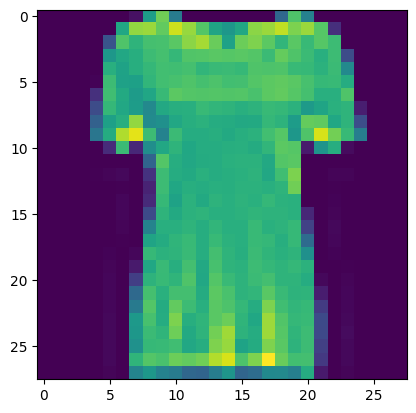

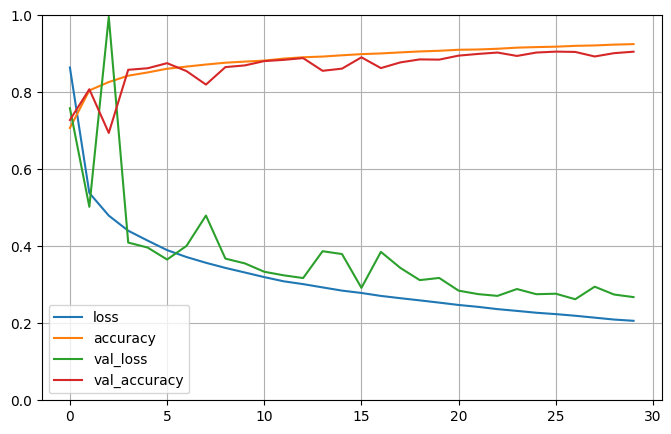

In [21]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

* The model is not converged yet as the validation accuracy still going up and validation loss is still going low.
* So for our next try we should run it for more epox.
* we can directly run for further next epochs it will start where it is stopped.

In [23]:
ev = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2774 - accuracy: 0.9010


In [24]:
ev

[0.2773568630218506, 0.9010000228881836]

In [25]:
model.evaluate(x_train, y_train)

1719/1719 [==============================] - 10s 6ms/step - loss: 0.2008 - accuracy: 0.9262


[0.20083682239055634, 0.9262181520462036]

In [26]:
x_new = x_test[: 3]

In [31]:
# Get the predictions (probabilities) for the new data
y_pred = model.predict(x_new)

# Convert the probabilities to class labels by selecting the index of the max probability
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the predicted class labels
y_pred_classes

1/1 [==============================] - 0s 37ms/step


array([9, 2, 1], dtype=int64)

In above output considered 3 records as per x_new variable and each row contains 10 values corresponds to each class like t_shirt, trouser, etc. and the values present inside it represents the probabilities.

In [32]:
y_test[: 3]

array([9, 2, 1], dtype=uint8)

In [33]:
print(plt.imshow(x_test[0].reshape((28, 28))))

AxesImage(shape=(28, 28))


## Pooling vs Non Pooling

In [37]:
#with pooling
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu', input_shape = (28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation = 'relu'))
model_a.add(keras.layers.Dense(100, activation = 'relu'))
model_a.add(keras.layers.Dense(10, activation = 'softmax'))

#without pooling
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu', input_shape = (28, 28, 1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation = 'relu'))
model_b.add(keras.layers.Dense(100, activation = 'relu'))
model_b.add(keras.layers.Dense(10, activation = 'softmax'))

In [38]:
model_a.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_9 (Dense)             (None, 300)               1622700   
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                      

In [39]:
model_b.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_4 (Flatten)         (None, 21632)             0         
                                                                 
 dense_12 (Dense)            (None, 300)               6489900   
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_a.compile(loss = "sparse_categorical_crossentropy",
               optimizer = "sgd",
               metrics = ["accuracy"])
model_b.compile(loss = "sparse_categorical_crossentropy",
               optimizer = "sgd",
               metrics = ["accuracy"])

In [42]:
model_history_a = model_a.fit(x_train, y_train, epochs = 3, batch_size = 64,
                           validation_data = (x_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 10s 11ms/step - loss: 0.8650 - accuracy: 0.7057 - val_loss: 0.7183 - val_accuracy: 0.7404
Epoch 2/3
860/860 [==============================] - 9s 10ms/step - loss: 0.5330 - accuracy: 0.8079 - val_loss: 0.4955 - val_accuracy: 0.8128
Epoch 3/3
860/860 [==============================] - 9s 10ms/step - loss: 0.4754 - accuracy: 0.8288 - val_loss: 1.0161 - val_accuracy: 0.6942


In [43]:
model_history_b = model_b.fit(x_train, y_train, epochs = 3, batch_size = 64,
                           validation_data = (x_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 9s 10ms/step - loss: 0.7246 - accuracy: 0.7517 - val_loss: 0.7568 - val_accuracy: 0.7210
Epoch 2/3
860/860 [==============================] - 9s 10ms/step - loss: 0.4892 - accuracy: 0.8236 - val_loss: 0.4568 - val_accuracy: 0.8276
Epoch 3/3
860/860 [==============================] - 9s 11ms/step - loss: 0.4375 - accuracy: 0.8422 - val_loss: 0.9469 - val_accuracy: 0.7004
